# Portfolio - Analysis of Heart Disease Data (2024 S1)

In this portfolio task, I will be working with a dataset named 'Heart Disease Data' that contains extensive medical information about patients and heart disease outcomes. The primary objective of this dataset is to train classification models to predict the likelihood of heart disease ('target' in the dataset). The main task is to train machine learning models to accurately predict the 'price range' based on the specifications provided. This will involve assessing various models and evaluating their strengths and weaknesses in terms of prediction accuracy, overfitting potential, F-Scores.

Link:'https://www.kaggle.com/datasets/mexwell/heart-disease-dataset'

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|age| Age of the patient in years|
|sex|Gender of the patient (0: female, 1: male)|
|chest pain type|Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)|
|resting bp s|Resting blood pressure in mm Hg|
|cholesterol|Serum cholesterol in mg/dl|
|fasting blood sugar|Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)|
|resting ecg|Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy by Estes's criteria)|
|max heart rate|Maximum heart rate achieved|
|exercise angina|Exercise induced angina (0: no, 1: yes)|
|oldpeak| ST depression|
|ST slope| Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)|
|target| Heart disease status (0: normal, 1: heart disease)|


 ## Propose well-defined questions:
 1. Explore the data.
 2. Clean the data: removing abnormal instances and replacing missing values.
 3. Study the correlation. And select the variables that you think are helpful for predicting the target.
 4. Split the dataset (Trainging set : Test set = 8 : 2).
 5. Train a logistic regression model to predict 'target' based on the selected features.
 6. Train a Neural Network model to predict 'target' based on the selected features. Tune the hyperparameter in Neural Network.
 7. Train a KNN model to predict 'target' based on the selected features. Tune the hyper-parameter K in KNN.
 8. Train a GaussianNB model to predict 'target' based on the selected features.

## Explore Data:

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
# Describe data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
# Displaying the shape of the dataset:
df.shape

(1190, 12)

In [6]:
# Displaying the first few rows of new DataFrame:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
# Descriptive statistics, e.g., the total number, mean, std, min and max:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
# Counting number of Null values in each column:
print('The number of Null values:\n',df.isnull().sum())

The number of Null values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


There are no missing values in this dataset.

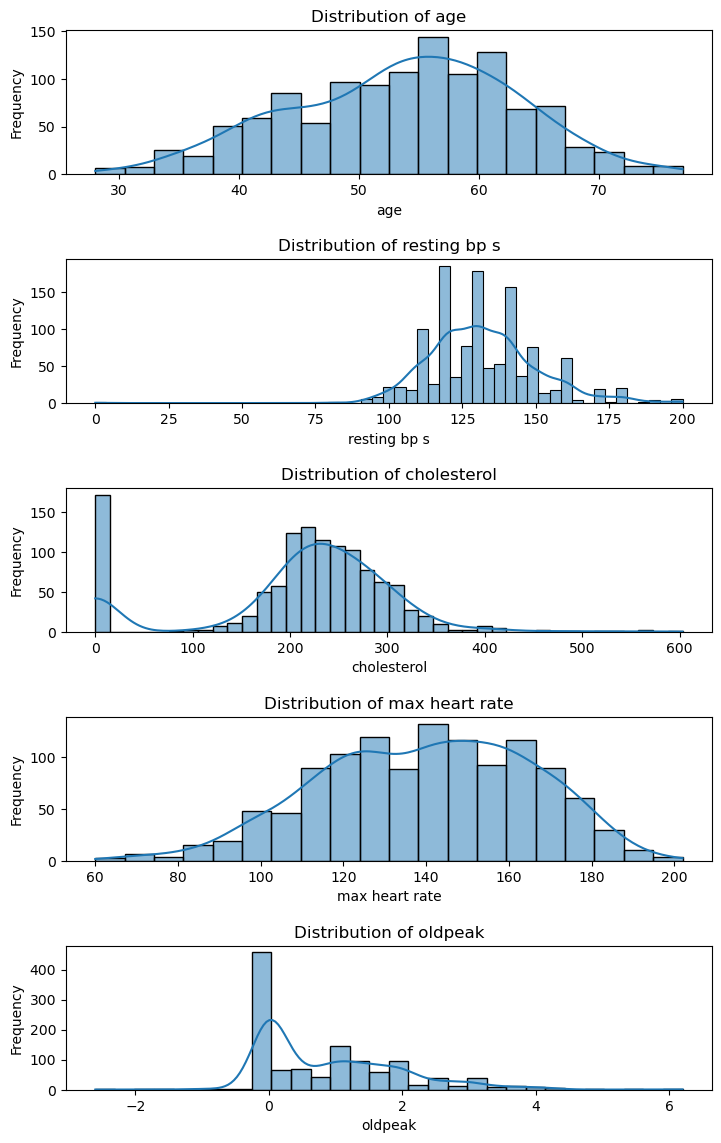

In [619]:
# Histograms for numerical variables:
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
fig, axes = plt.subplots(5, 1, figsize=(8, 12))
fig.tight_layout(pad=4.0)
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column],ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

- Age is approximately normally distributed in this dataset. The majority are concentrated around 50-60 years old.
- Resting blood pressure have few zero values, which is impossible. They range from 0 mm Hg to 200 mm Hg, with most values clustering around 100 to 150 mm Hg. These values at very low resting blood pressures can be outliers.
- There are large amount of 0 cholesterol values, which is impossible. Most of data is from 200 to 300 mg/dl but there are few values above 500 mg/dl.
- The heart rate values spread from below 70 to about 200, with most values around 120-160.
- 'Outpeak' has a lot value of 0. There are some negative values, that is unusual.

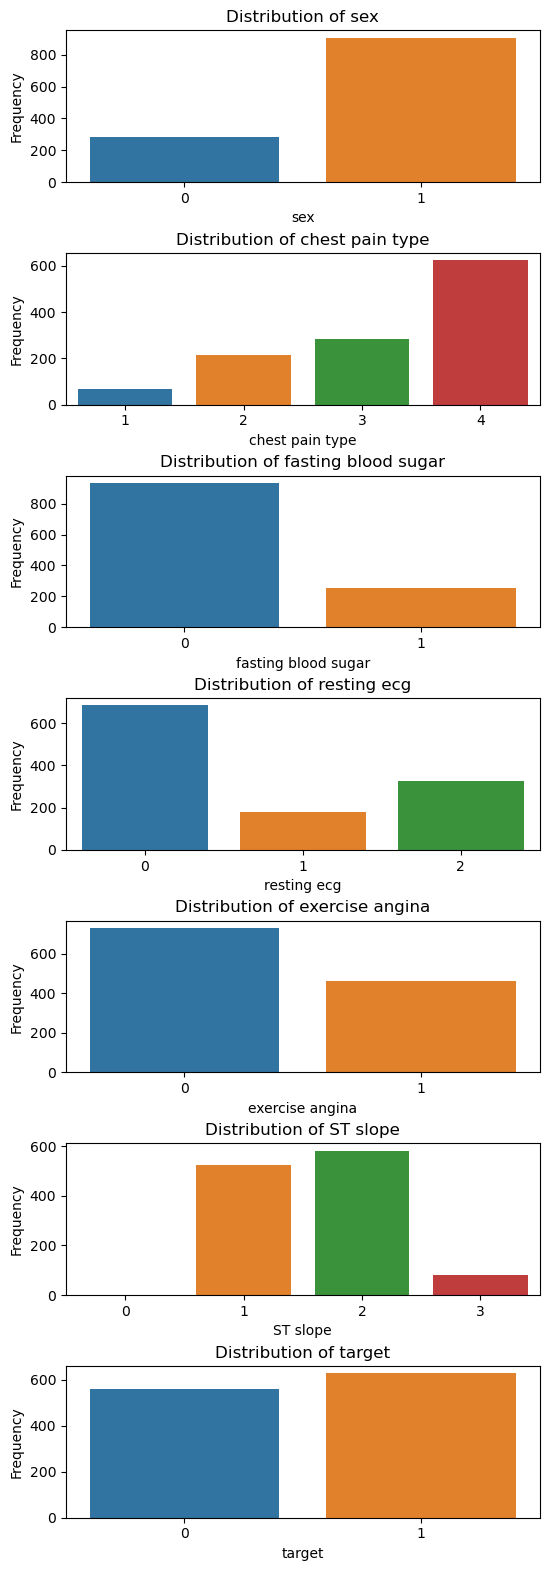

In [620]:
# Visualizing the distribution of categorical variables using bar charts:
categorical_columns = [col for col in df.columns if col not in numeric_columns]
fig, axes = plt.subplots(7, 1, figsize=(6, 16))
fig.tight_layout(pad=3.0)
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column,ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

- The chart for sex shows a significant imbalance between the two categories, with category 1 (male) is higher than  category 0 (man).
- The distribution of chest pain types is unbalanced. Type 4 (Asymptomatic) is the most common category, Type 1 (Typical Angina) is the least frequent among the categories shown.
- Category "0" represents individuals with fasting blood sugar levels below 120 mg/dL, showing a significantly higher frequency .
- From the resting ecg plot, Category "0" (Normal): this category has the highest frequency, indicating that the majority of the individuals have normal ECG results.
- Category "0" (No Exercise Angina): this category shows a higher frequency.
- Category "0" (Upsloping): no individuals in the dataset displayed an upsloping ST segment.
- Category "1" (Heart Disease) is a higher frequency Category "0" which is no heart disease.

## Data Cleaning:

Text(0.5, 1.0, 'Box Plot of Numerical Variables')

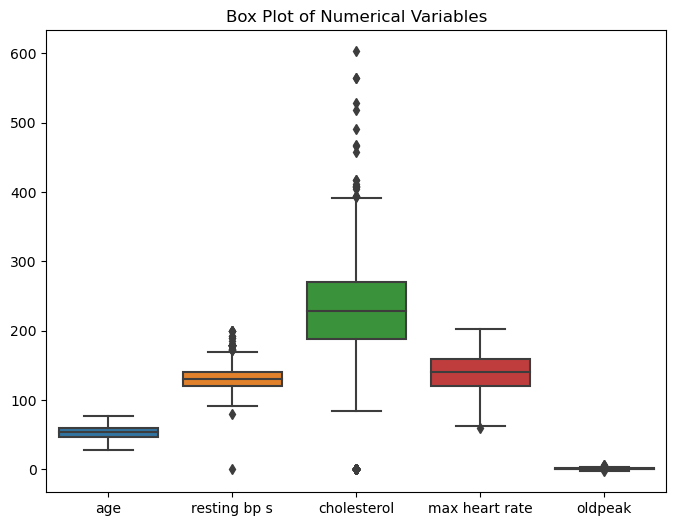

In [9]:
#Box plots for numerical variables to check for outliers
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
plt.figure(figsize=(8,6))
sns.boxplot(df[numeric_columns])
plt.title('Box Plot of Numerical Variables')

From the boxplot, there are some outliers in the dataset.

In [10]:
# Remove outliers using IQR:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = ((df[numeric_columns] >= lower_bound) & (df[numeric_columns] <= upper_bound))

df_cleaned = df[condition.all(axis=1)]
df_cleaned

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [11]:
print(f"Number of records after cleaning: {df_cleaned.shape[0]}")

Number of records after cleaning: 961


## Correlations:

In [12]:
# Correlations of all features:
correlation = df_cleaned.corr()
correlation

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.033649,0.156183,0.265879,0.098177,0.206091,0.194236,-0.394541,0.207380,0.267962,0.241786,0.285016
sex,0.033649,1.000000,0.140682,0.064356,-0.092287,0.091882,0.017395,-0.143765,0.221401,0.159645,0.139488,0.319549
chest pain type,0.156183,0.140682,1.000000,0.009559,0.068923,0.002039,0.089385,-0.337315,0.418418,0.258039,0.279137,0.450947
resting bp s,0.265879,0.064356,0.009559,1.000000,0.104952,0.156726,0.060291,-0.125430,0.125727,0.178899,0.115928,0.160962
cholesterol,0.098177,-0.092287,0.068923,0.104952,1.000000,0.033410,0.097001,-0.004454,0.104512,0.051567,0.028850,0.115347
fasting blood sugar,0.206091,0.091882,0.002039,0.156726,0.033410,1.000000,0.103783,-0.084236,0.073699,0.040038,0.116445,0.116026
resting ecg,0.194236,0.017395,0.089385,0.060291,0.097001,0.103783,1.000000,0.006991,0.065970,0.108163,0.112837,0.132532
max heart rate,-0.394541,-0.143765,-0.337315,-0.125430,-0.004454,-0.084236,0.006991,1.000000,-0.410257,-0.280596,-0.354575,-0.402171
exercise angina,0.207380,0.221401,0.418418,0.125727,0.104512,0.073699,0.065970,-0.410257,1.000000,0.437724,0.426116,0.518085
oldpeak,0.267962,0.159645,0.258039,0.178899,0.051567,0.040038,0.108163,-0.280596,0.437724,1.000000,0.593308,0.481898


<Axes: >

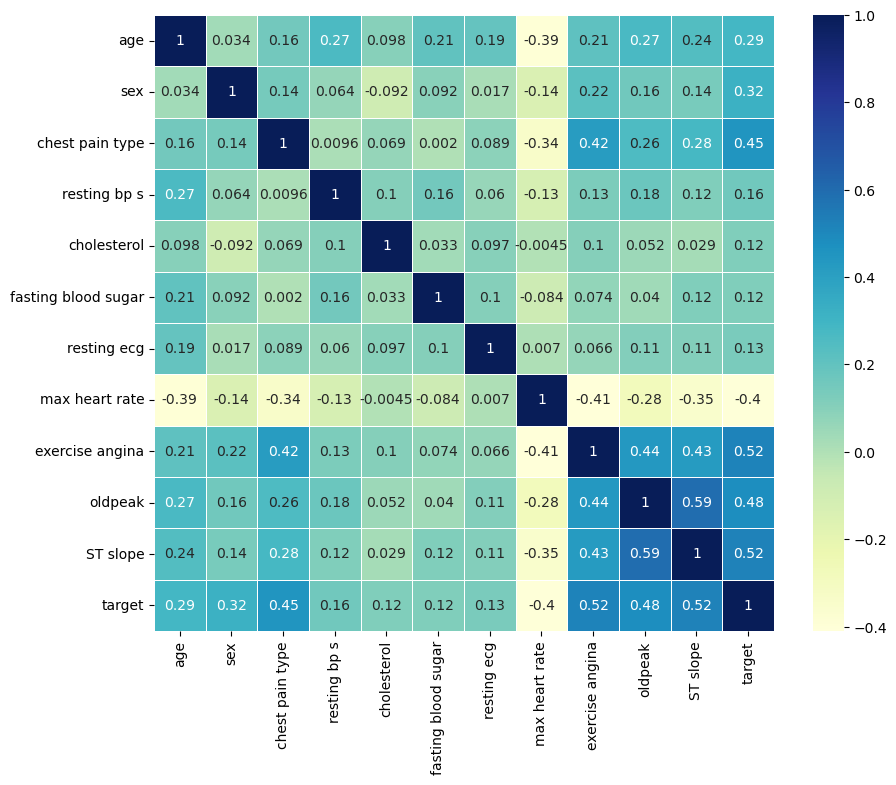

In [13]:
# create heatmap of correlations:
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', linewidths=.5)

In [14]:
# Correlations of 'target' with other features:
correlation['target']

age                    0.285016
sex                    0.319549
chest pain type        0.450947
resting bp s           0.160962
cholesterol            0.115347
fasting blood sugar    0.116026
resting ecg            0.132532
max heart rate        -0.402171
exercise angina        0.518085
oldpeak                0.481898
ST slope               0.522354
target                 1.000000
Name: target, dtype: float64

- ST slope (0.522354),chest pain type (0.450947),exercise angina (0.518085), oldpeak (0.481898):  a high positive correlation with 'target'
- sex (0.319549), age (0.285016): a reasonable positive correlation with 'target' 
- max heart rate (-0.402171): a negative correlation with 'target'
- resting bp s (0.160962), cholesterol (0.115347), fasting blood sugar (0.116026), resting ecg (0.132532): these variables show a weak relationship with the 'target'

Based on he correlation coefficients between 'target' and other features, we can determine which features may be heplful for predicting the heart disease. These are ST slope ,chest pain type ,exercise angina , oldpeak, sex, max heart rate.

/Users/tranngoctramanh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1200 with 0 Axes>

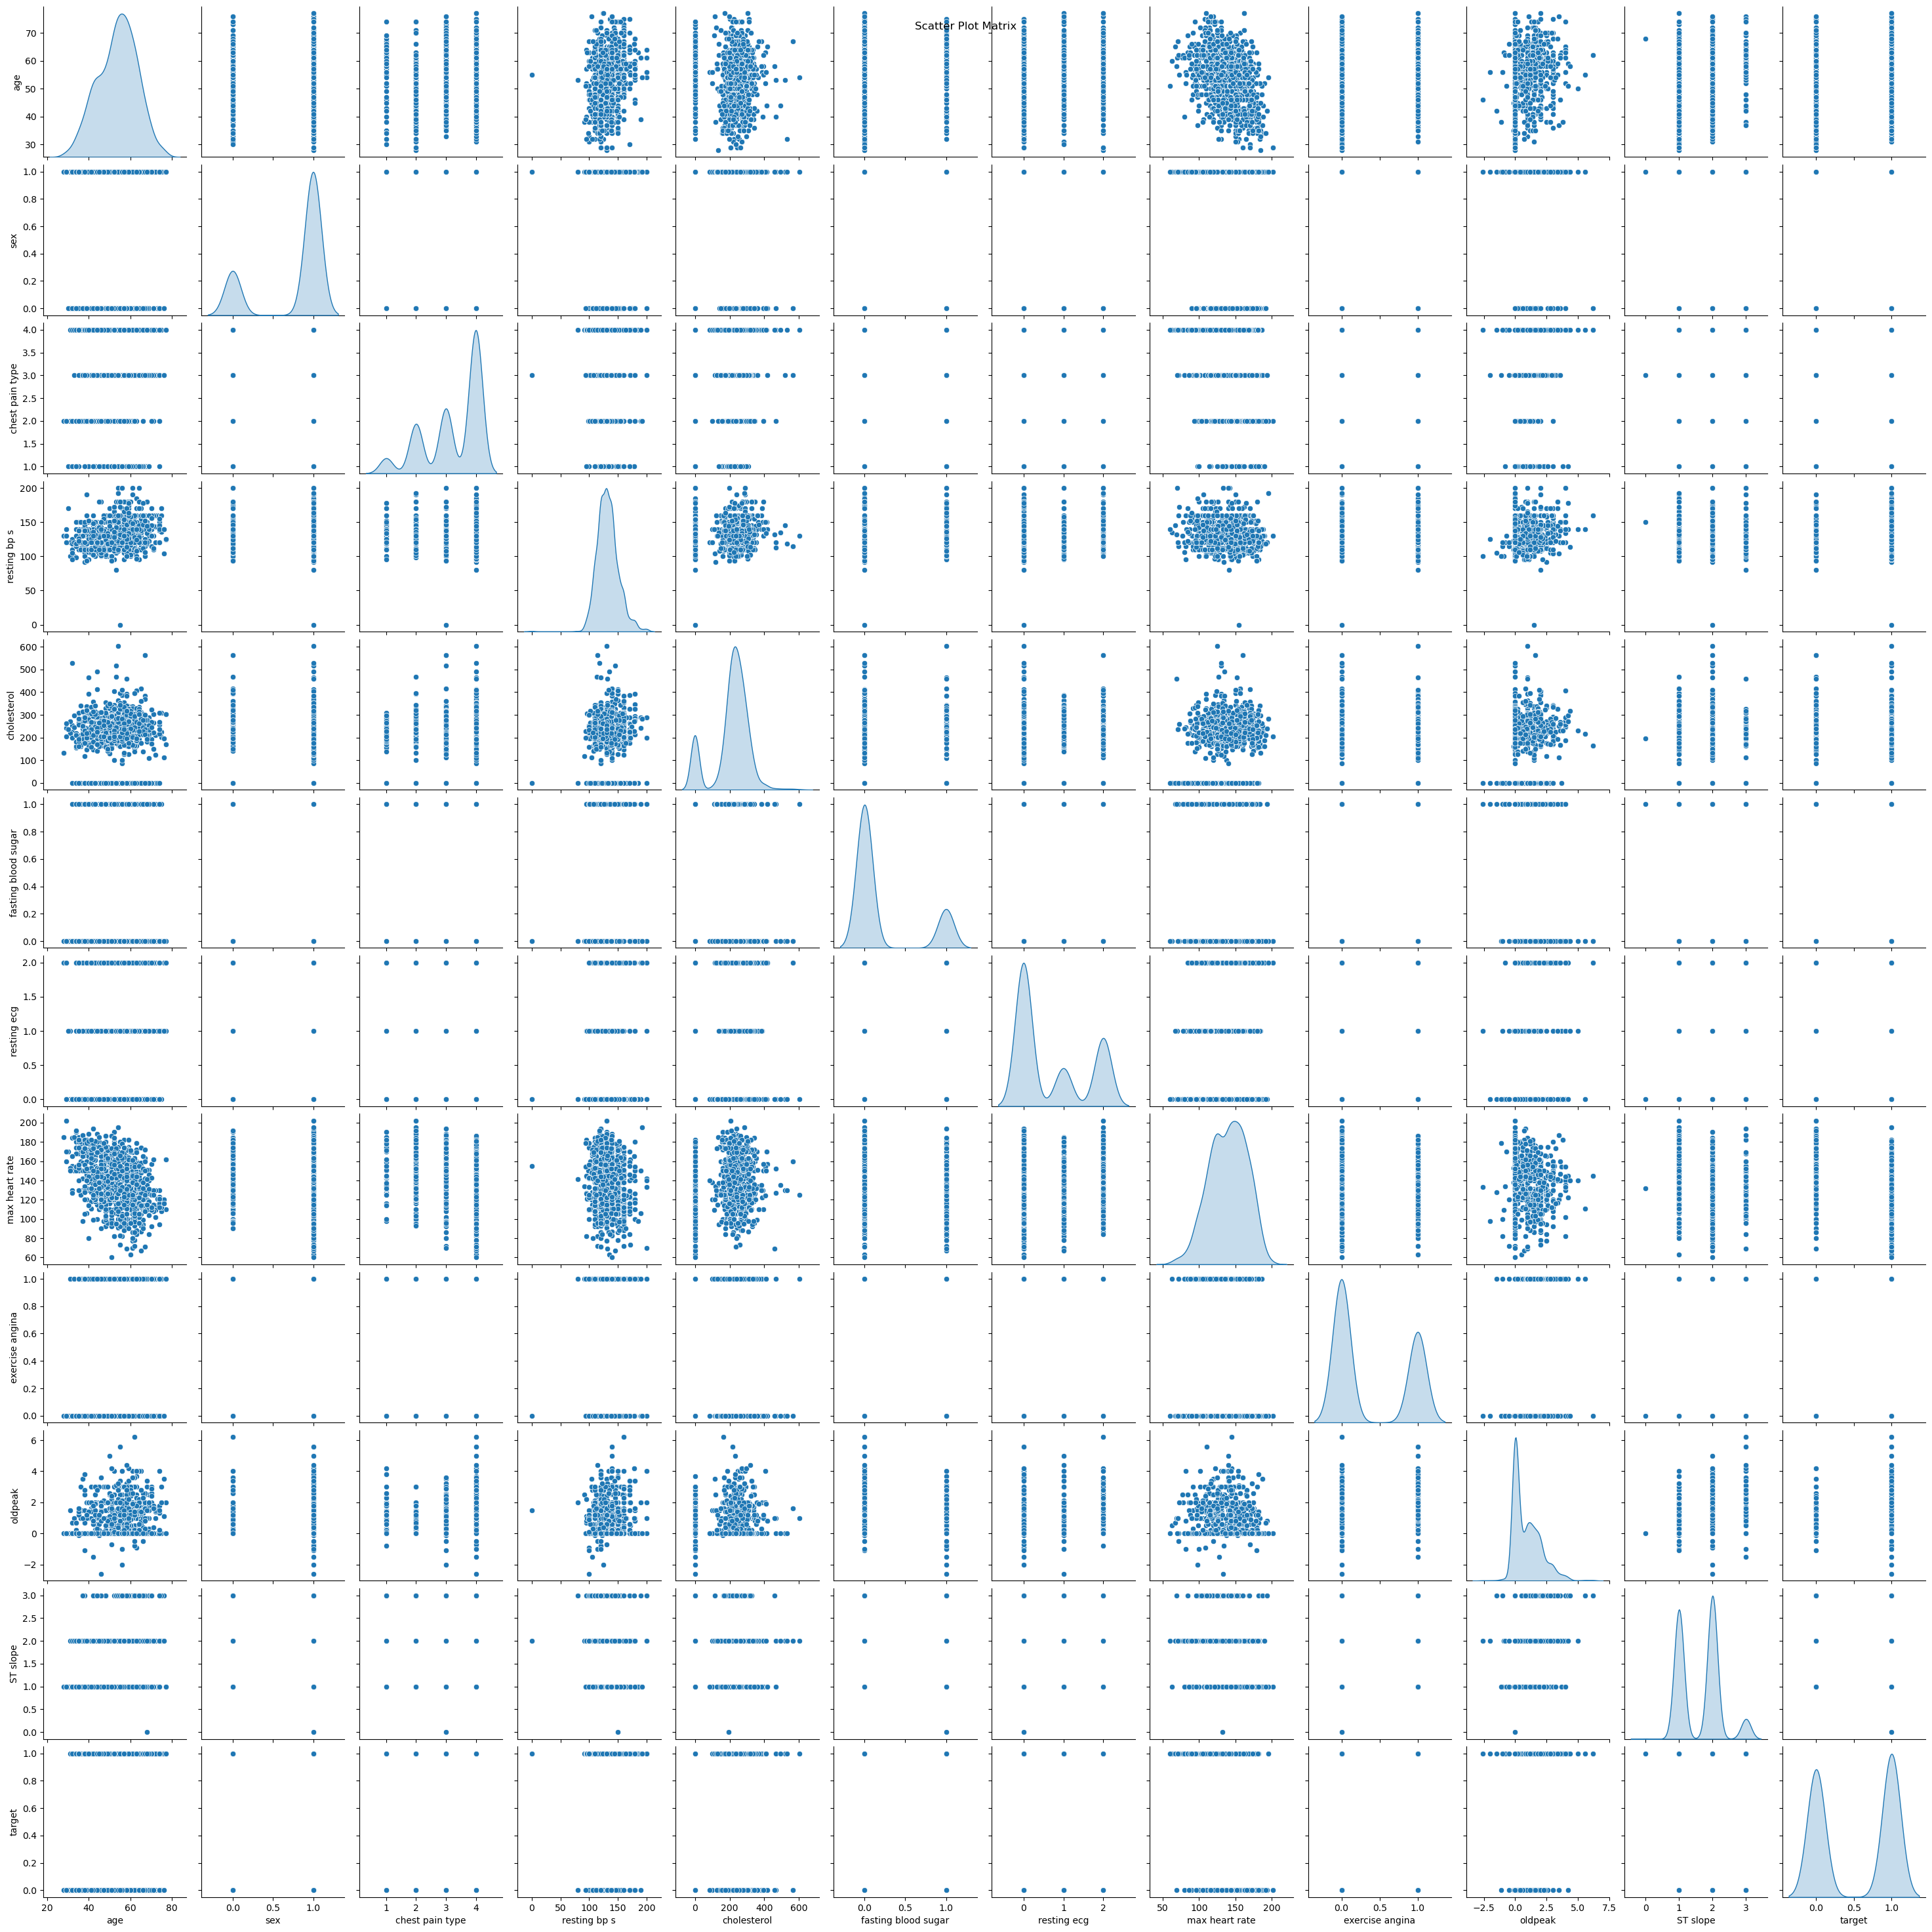

In [15]:
# Scatter plot matrix
plt.figure(figsize=(12, 12))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix')
plt.show()

## Split the dataset:

In [16]:
# # Spliting the dataset (Trainging set : Test set = 8: 2):
train,test = train_test_split(df_cleaned,test_size = 0.2, random_state = 42)

In [17]:
print('The shape of training dataset :',train.shape)

The shape of training dataset : (768, 12)


In [18]:
print('The shape of training dataset :',test.shape)

The shape of training dataset : (193, 12)


## Logistic regression model:

In [19]:
# Training a logistic regression model:
from sklearn.linear_model import LogisticRegression

selected_features = ['chest pain type', 'exercise angina','sex', 'ST slope','oldpeak','max heart rate']

X_train = train[selected_features]
y_train = train['target']

X_test = test[selected_features]
y_test = test['target']

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [632]:
# predicting 'target'
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

# Calculating the accuracy:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)

Accuracy on training set: 0.8372395833333334
Accuracy on testing set: 0.8549222797927462


### Model Explaination:
Logistic Regression is used when the dependent variable is binary or categorical. The target variable consists of binary value (0 and 1), 1 represents the presence of heart disease, 0 represents no heart disease (normal). 

### Model Evaluation:
- Training Accuracy (83.72%) indicating that the model performs reasonably well on the training data. The model is successful in predicting whether a patient has heart disease or not.
- Testing Accuracy (85.49%) is higher than training accuracy, indicating that the model can generalize reasonably well to unseen data and is not overfitting to the training data.

In [633]:
# Checking confusion matrix with training dataset:
confusion_matrix(y_train,train_predictions)

array([[360,  61],
       [ 64, 283]])

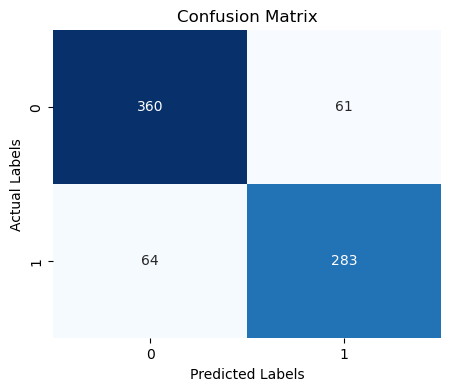

In [634]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train,train_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#### Evaluation:
- True Positives (TP = 283): The model predicts correctly 283 instances of class 1, which is heart disease.
- True Negatives (TN = 360): The model predicts correctly 360 instances of class 0, which is no heart disease.
- False Positives (FP = 61): The model incorrectly predicted heart disease, 61 instances are heart disease but actually they are no heart disease.
- False Negatives (FN = 64): The model incorrectly predicted no heart disease, 64 instances are no heart disease but actually they are heart disease.

In [635]:
#Checking Classification Report:
report_train = classification_report(y_train, train_predictions)
print("Classification Report:\n",report_train)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       421
           1       0.82      0.82      0.82       347

    accuracy                           0.84       768
   macro avg       0.84      0.84      0.84       768
weighted avg       0.84      0.84      0.84       768



The overall accuracy for the training set is 84%, indicating that the model has learned well from the training data.

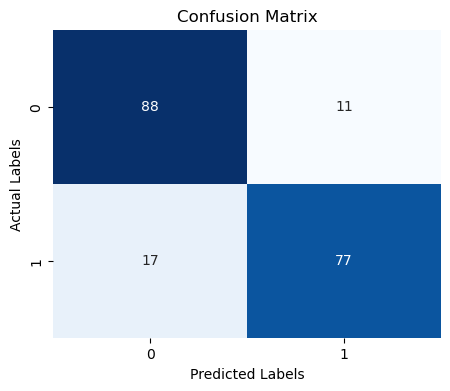

In [636]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test,test_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#### Evaluation:
- True Positives (TP = 77): The model predicts correctly 77 instances of class 1, which is heart disease.
- True Negatives (TN = 88): The model predicts correctly 88 instances of class 0, which is no heart disease.
- False Positives (FP = 11): The model incorrectly predicted heart disease, 11 instances are heart disease but actually they are no heart disease.
- False Negatives (FN = 17): The model incorrectly predicted no heart disease, 17 instances are no heart disease but actually they are heart disease. 

In [637]:
# Checking Classification Report:
report_test = classification_report(y_test, test_predictions)
print("Classification Report:\n",report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        99
           1       0.88      0.82      0.85        94

    accuracy                           0.85       193
   macro avg       0.86      0.85      0.85       193
weighted avg       0.86      0.85      0.85       193



#### Evaluation:
- The overall accuracy of predictions is relatively hight (85%), indicating a strong model performance which effectively distinguishing between patients with and without heart disease.
- Precision: A precision of 88% for predicting heart disease, indicating that model predict correctly 88% cases are heart disease.
- Recall: A recall of 82% for predicting heart disease is quite crucial, especially on medical diagnostics, it dectets 82% of all actual cases of heart disease.

## Neural Network Model:

In [676]:
# Train model with neural network:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', alpha=0.0001, random_state=42)
clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', max_iter=1000, random_state=42, solver='lbfgs')

In [677]:
# predicting 'target'
train_predictions_mlp = clf_mlp.predict(X_train)
test_predictions_mlp = clf_mlp.predict(X_test)

# Calculating the accuracy:
train_accuracy_mlp = accuracy_score(y_train, train_predictions_mlp)
test_accuracy_mlp = accuracy_score(y_test, test_predictions_mlp)

print("Accuracy on training set:", train_accuracy_mlp)
print("Accuracy on testing set:", test_accuracy_mlp)

Accuracy on training set: 0.8346354166666666
Accuracy on testing set: 0.8497409326424871


#### Evaluation:
- The Neural Network with the tanh activation function show a similar in both training and testing accuracy compared to Logistic Regression model.
- Training Accuracy (83.46%):the model performs well on the training data, suggesting that the model can capture the patterns needed to make accurate predictions.
- Testing Accuracy (84.97%): The testing accuracy is even slightly higher than training accuracy, indicating that the model can generalize reasonably well to unseen data and is not overfitting to the training data

In [678]:
# Checking confusion matrix with training dataset:
confusion_matrix(y_train,train_predictions_mlp)

array([[354,  67],
       [ 60, 287]])

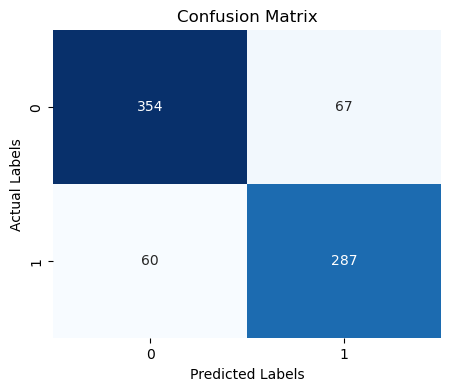

In [679]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train,train_predictions_mlp), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [680]:
# Checking Classification Report:
report_mlp_train = classification_report(y_train, train_predictions_mlp)
print("Classification Report:\n",report_mlp_train)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       421
           1       0.81      0.83      0.82       347

    accuracy                           0.83       768
   macro avg       0.83      0.83      0.83       768
weighted avg       0.84      0.83      0.83       768



In [681]:
# Checking confusion matrix with testing dataset:
confusion_matrix(y_test,test_predictions_mlp)

array([[86, 13],
       [16, 78]])

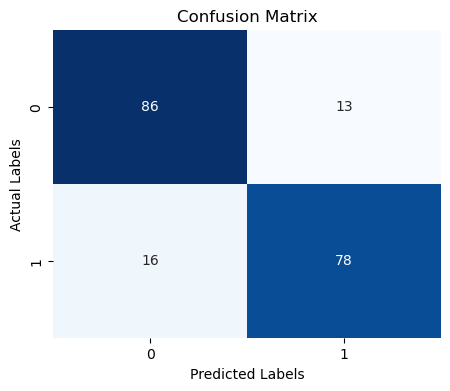

In [682]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test,test_predictions_mlp), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#### Evaluation:
- True Positives (TP = 78): The model predicts correctly 78 instances of class 1, which is heart disease.
- True Negatives (TN = 86): The model predicts correctly 86 instances of class 0, which is no heart disease.
- False Positives (FP = 13): The model incorrectly predicted heart disease, 13 instances are heart disease but actually they are no heart disease.
- False Negatives (FN = 16): The model incorrectly predicted no heart disease, 16 instances are no heart disease but actually they are heart disease.

In [683]:
# Checking Classification Report:
report_mlp_test = classification_report(y_test, test_predictions_mlp)
print("Classification Report:\n",report_mlp_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        99
           1       0.86      0.83      0.84        94

    accuracy                           0.85       193
   macro avg       0.85      0.85      0.85       193
weighted avg       0.85      0.85      0.85       193



#### Evaluation:
- The overall accuracy of predictions is relatively hight (85%), which is the same as Logistic Regression, indicating a strong model performance which effectively distinguishing between patients with and without heart disease.
- Precision: A precision of 86% for predicting heart disease, indicating that model predict correctly 86% cases are heart disease, which is lower than Logistic Regression, indicating a slightly higher rate of false positives.
- Recall: A recall of 83% for predicting heart disease is quite crucial, especially on medical diagnostics, it dectets 83% of all actual cases of heart disease, implying that the neural network is slightly better at identifying all positive instances.

In [684]:
# Tune hyperparameter:
from sklearn.model_selection import GridSearchCV

X = df.drop(['target'], axis=1)
y = df['target']

mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid = {
    'activation': ['tanh', 'relu','logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

clf = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')  
clf.fit(X, y)

print("Best parameters:",clf.best_params_)

Best parameters: {'activation': 'logistic', 'alpha': 0.01}


After tuning the hyperparameter using the GridSearchCV,  the best parameters are 'activation': 'logistic' and 'alpha': 0.01'. A higher value implies more significant regularization, penalizing more large parameter valuesa and obtaining more paramaters closer to zero, which reduces overfitting.

In [688]:
# Evaluate the model with the best 
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
train_accuracy_mlp_tune = best_model.score(X_train, y_train)
test_accuracy_mlp_tune = best_model.score(X_test, y_test)
print('Training accuracy:',best_model.score(X_train, y_train))
print('Test accuracy:',best_model.score(X_test, y_test))

Training accuracy: 0.8294270833333334
Test accuracy: 0.8652849740932642


The testing accuracy post hyperparameter tuning (86.53%) is an improvement over the earlier performance (84.46%) 

In [687]:
# Checking Classification Report:
test_pred_mlp_tune = best_model.predict(X_test)
report_mlp_tune = classification_report(y_test, test_pred_mlp_tune)
print("Classification Report:\n",report_mlp_tune)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        99
           1       0.88      0.84      0.86        94

    accuracy                           0.87       193
   macro avg       0.87      0.86      0.86       193
weighted avg       0.87      0.87      0.87       193



- After tuning, the model achieves higher precision, particularly for predicting heart disease (Class 1), which increased from 0.86 to 0.88, showing more accurate when it predicts heart disease.
- The recall for class 0 improved from 0.87 to 0.89, indicating better identification of no heart disease cases.
- There is an increase in the F1-scores for both classes.

## KNN Model:

In [552]:
# Importing libraries and training KNN model with K=5:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [553]:
# predicting 'target'
train_predictions_knn = knn.predict(X_train)
test_predictions_knn = knn.predict(X_test)

# Calculating the accuracy:
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)

print("Accuracy on training set:", train_accuracy_knn)
print("Accuracy on testing set:", test_accuracy_knn)

Accuracy on training set: 0.8671875
Accuracy on testing set: 0.7668393782383419


#### Evaluation:
- Training Accuracy (86.71%): The model can predict the outcomes for approximately 86.71%. This is a high performance, showing that the model can capture the complexities of the dataset.
- Testing Accuracy (71.5%): A decrease from training accuracy 86.71% to testing accuracy 71.5%, suggesting that the model might be overfitting and may not generalize perfectly to new data.

In [604]:
# Checking confusion matrix with training dataset:
confusion_matrix(y_train,train_predictions_knn)

array([[377,  44],
       [ 58, 289]])

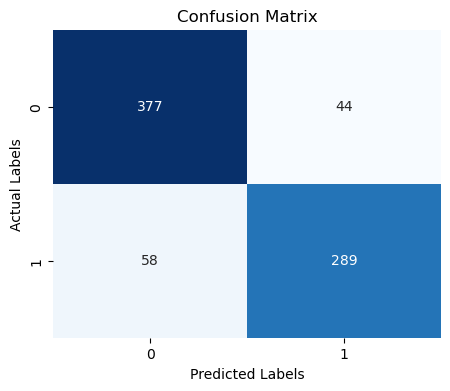

In [605]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train,train_predictions_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [606]:
# Checking Classification Report:
report_knn = classification_report(y_train, train_predictions_knn)
print("Classification Report:\n",report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       421
           1       0.87      0.83      0.85       347

    accuracy                           0.87       768
   macro avg       0.87      0.86      0.87       768
weighted avg       0.87      0.87      0.87       768



In [554]:
# Checking confusion matrix with testing dataset:
confusion_matrix(y_test,test_predictions_knn)

array([[80, 19],
       [26, 68]])

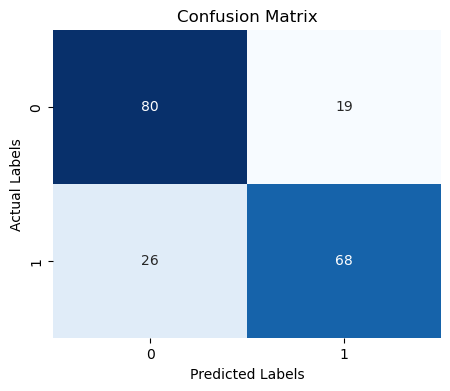

In [555]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test,test_predictions_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#### Evaluation:
- True Positives (TP = 68): The model predicts correctly 68 instances of class 1, which is heart disease. This metric is lower than Logistic Regression and Neutral Network. 
- True Negatives (TN = 80): The model predicts correctly 80 instances of class 0, which is no heart disease.
- False Positives (FP = 19): The model incorrectly predicted heart disease, 19 instances are heart disease but actually they are no heart disease.
- False Negatives (FN = 26): The model incorrectly predicted no heart disease, 26 instances are no heart disease but actually they are heart disease.

In [556]:
# Checking Classification Report:
report_knn = classification_report(y_test, test_predictions_knn)
print("Classification Report:\n",report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.78      0.72      0.75        94

    accuracy                           0.77       193
   macro avg       0.77      0.77      0.77       193
weighted avg       0.77      0.77      0.77       193



- The KNN model's accuracy is noticeably lower than both the Logistic Regression and Neural Network models, which both reported accuracies of 85%
- precision and recall in KNN has generally lower scores in both metrics compared to the Logistic Regression and Neural Network models, suggesting that KNN is slightly less effective at predicting heart disease.
- Lower F1-score suggests that KNN might not be as effective in handling the classification tasks for this particular dataset.

## Tune the hyper-parameter K:

In [557]:
# Importing libraries:
from sklearn.model_selection import GridSearchCV

In [558]:
# Tune the hyper-parameter K:
X = df.drop(['target'], axis=1)
y = df['target']

# Defining search space for parameters
param_grid = {'n_neighbors': range(1, 35)} 
# Initialising gs object
knn_clf = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn_clf ,     
                  param_grid=param_grid, 
                  scoring='accuracy',                   
                  cv=10)

gs.fit(X_train, y_train)
print("The best mean accuracy score:",gs.best_score_)
print("The best value of K:", gs.best_params_)

The best mean accuracy score: 0.8633116883116884
The best value of K: {'n_neighbors': 1}


In [689]:
# Evaluate the model with the best K value
best_classifier = gs.best_estimator_
best_classifier.fit(X_train, y_train)
train_accuracy_knn_tune = best_classifier.score(X_train, y_train)
test_accuracy_knn_tune = best_classifier.score(X_test, y_test)
print(f'Training accuracy: {best_classifier.score(X_train, y_train):.3f}')
print(f'Test accuracy: {best_classifier.score(X_test, y_test):.3f}')

Training accuracy: 0.993
Test accuracy: 0.855


#### Evaluation:
- Training Accuracy (99.3%): the model fits the training data very well, almost perfectly capturing the relationships between the features and the target.
- Test Accuracy (85.5%): a significant drop from the training accuracy to test Accuracy indicates a disparity in model performance between seen and unseen data, suggesting potential overfitting.
  
  => KNN may not be the best model for predicting heart disease in this case.

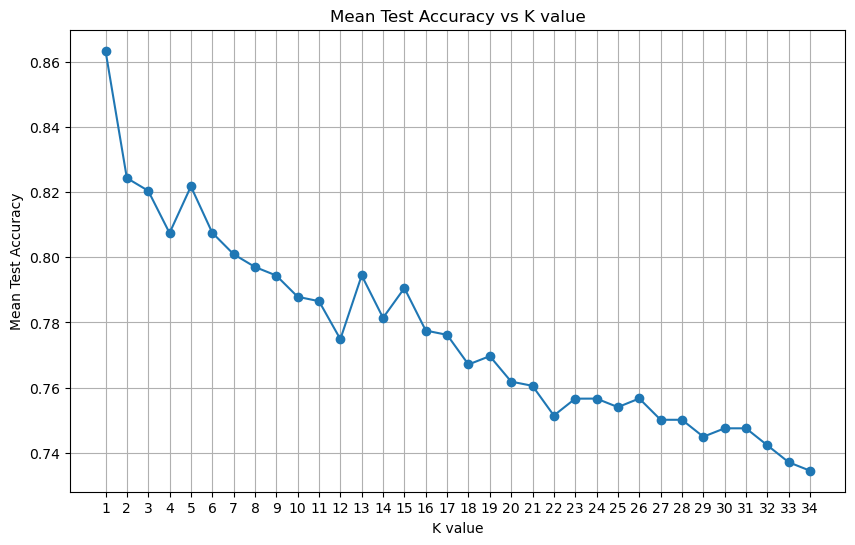

In [560]:
# Visualizing the results:
mean_test_scores = gs.cv_results_['mean_test_score']
k = range(1, 35)

plt.figure(figsize=(10, 6))
plt.plot(k, mean_test_scores, marker='o')
plt.title('Mean Test Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Mean Test Accuracy')
plt.xticks(k)
plt.grid(True)
plt.show()

In [695]:
# Checking Classification Report:
test_pred_knn_tune = best_classifier.predict(X_test)
report_knn_tune = classification_report(y_test, test_pred_knn_tune)
print("Classification Report:\n",report_knn_tune)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        99
           1       0.84      0.87      0.85        94

    accuracy                           0.85       193
   macro avg       0.86      0.86      0.85       193
weighted avg       0.86      0.85      0.85       193



## Gaussian Naive Bayes classifier model:

In [561]:
# Create and training a Gaussian Naive Bayes classifier model:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()

In [562]:
# predicting 'target'
train_predictions_gnb = clf_gnb.predict(X_train)
test_predictions_gnb = clf_gnb.predict(X_test)

# Calculating the accuracy:
train_accuracy_gnb = accuracy_score(y_train, train_predictions_gnb)
test_accuracy_gnb = accuracy_score(y_test, test_predictions_gnb)

print("Accuracy on training set:", train_accuracy_gnb)
print("Accuracy on testing set:", test_accuracy_gnb)

Accuracy on training set: 0.8255208333333334
Accuracy on testing set: 0.8549222797927462


#### Evaluation:
These accuracies is quite good, especially for a Naive Bayes classifier, which is a simpler model compared to more complex algorithms like neural networks. The test accuracy is 85.49%, suggesting that the model is generalizing well to unseen data.

In [563]:
print('Estimated probability of classess: \n', clf_gnb.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf_gnb.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf_gnb.var_)

Estimated probability of classess: 
 [0.54817708 0.45182292]
Estimated mean for each Gaussian distribution: 
 [[2.74346793e+00 1.35391924e-01 6.24703088e-01 1.27790974e+00
  4.50593824e-01 1.51703088e+02]
 [3.64553314e+00 6.54178674e-01 9.07780980e-01 1.89337176e+00
  1.39798271e+00 1.32573487e+02]]
Estimated variance for each Gaussian distribution: 
 [[8.41555323e-01 1.17061554e-01 2.34449743e-01 2.62434239e-01
  4.92143956e-01 4.98422533e+02]
 [5.97696789e-01 2.26229540e-01 8.37152758e-02 2.56642549e-01
  1.13362766e+00 5.29916070e+02]]


Estimated probability of classess: (0.54817708, 0.45182292),  indicating almost balanced classes, showing that the model isn't heavily biased towards one class.

In [607]:
# Checking confusion matrix with training dataset:
confusion_matrix(y_train,train_predictions_gnb)

array([[360,  61],
       [ 73, 274]])

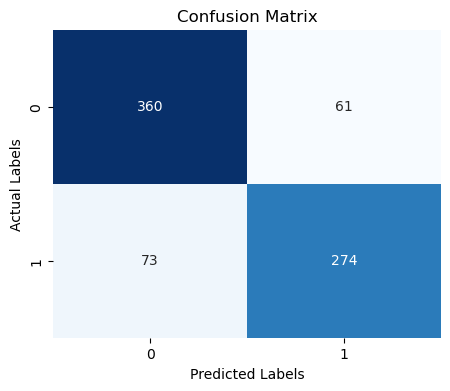

In [609]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train,train_predictions_gnb), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [608]:
# Checking Classification Report:
report_gnb = classification_report(y_train, train_predictions_gnb)
print("Classification Report:\n",report_gnb)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       421
           1       0.82      0.79      0.80       347

    accuracy                           0.83       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.83      0.83      0.83       768



In [564]:
# Checking confusion matrix with testing dataset:
confusion_matrix(y_test,test_predictions_gnb)

array([[88, 11],
       [17, 77]])

In [565]:
# Checking Classification Report:
report_gnb = classification_report(y_test, test_predictions_gnb)
print("Classification Report:\n",report_gnb)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        99
           1       0.88      0.82      0.85        94

    accuracy                           0.85       193
   macro avg       0.86      0.85      0.85       193
weighted avg       0.86      0.85      0.85       193



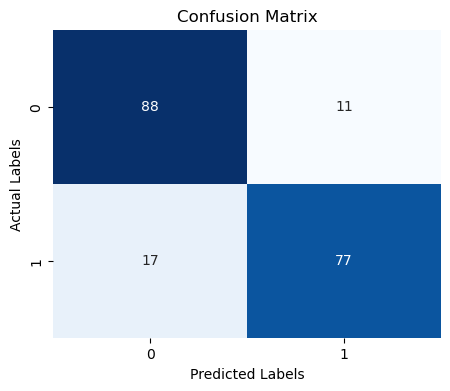

In [566]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test,test_predictions_gnb), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#### Evaluation:
- True Positives (TP = 77): The model predicts correctly 77 instances of class 1, which is heart disease.
- True Negatives (TN = 88): The model predicts correctly 88 instances of class 0, which is no heart disease.
- False Positives (FP = 11): The model incorrectly predicted heart disease, 11 instances are heart disease but actually they are no heart disease.
- False Negatives (FN = 17): The model incorrectly predicted no heart disease, 17 instances are no heart disease but actually they are heart disease.

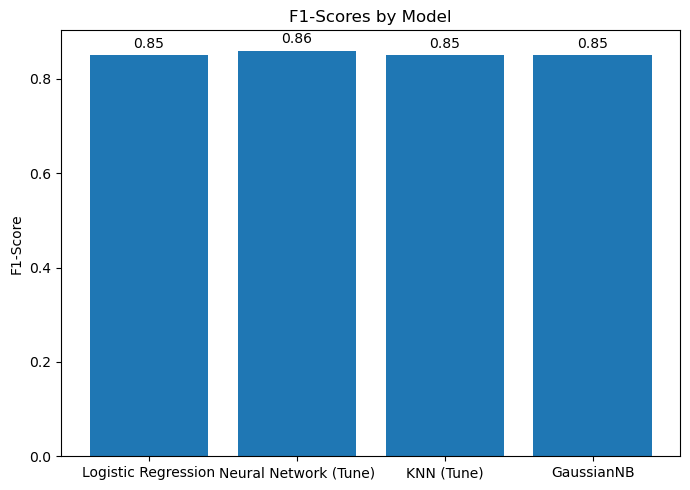

In [718]:
f1_scores = {
    'Logistic Regression': 0.85,
    'Neural Network (Tune)': 0.86,
    'KNN (Tune)': 0.85,
    'GaussianNB': 0.85
}
models = list(f1_scores.keys())
f1 = list(f1_scores.values())
plt.figure(figsize=(7,5))
plt.bar(models, f1)
plt.ylabel('F1-Score')
plt.title('F1-Scores by Model')

for i in range(len(f1)):
    plt.text(i, f1[i] + 0.01, f'{f1[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

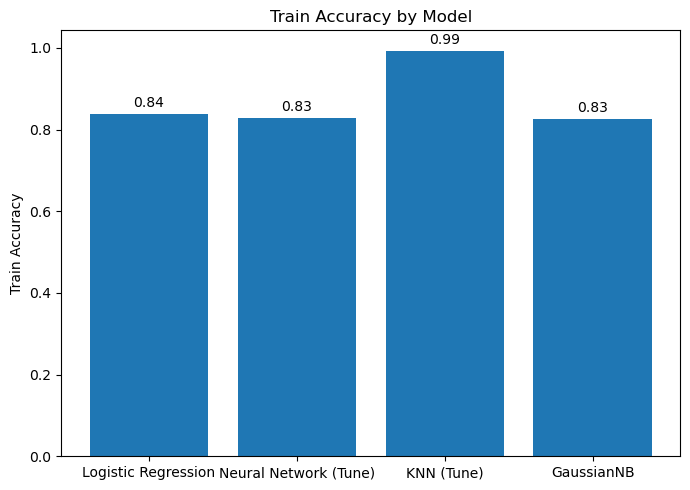

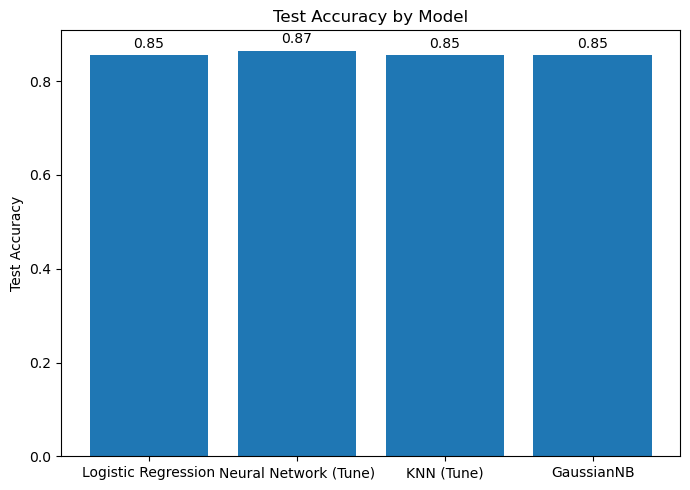

In [719]:
accuracy_train = [train_accuracy, train_accuracy_mlp_tune,train_accuracy_knn_tune,train_accuracy_gnb]
accuracy_test = [test_accuracy, test_accuracy_mlp_tune,test_accuracy_knn_tune,test_accuracy_gnb]

plt.figure(figsize=(7,5))
plt.bar(models, accuracy_train)
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy by Model')

for i in range(len(accuracy_train)):
    plt.text(i, accuracy_train[i] + 0.01, f'{accuracy_train[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.bar(models, accuracy_test)
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy by Model')

for i in range(len(accuracy_test)):
    plt.text(i, accuracy_test[i] + 0.01, f'{accuracy_test[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Neutral Network has the highest F1-accuracy 86% and test accuracy 87% (after tuning) so this model is slightly better than the other models. But, All four models show very similar F1-scores and test accuracy, suggesting these model might be suitable for predicting the heart disease.
- However, The KNN model before tuning F1-Score is quite low just 75%. After tuning, although its F1-score improved, the model demonstrated signs of overfitting—performing well on the training set 99% but significantly poorer on the test set 85%. So KNN may not be the best model for predicting heart disease in this case.
